In [1]:
import numpy as np  # mathematical operations on arrays and matrices
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualization and plotting
from sklearn.cluster import KMeans # clustering analysis using KMeans algorithm
import warnings 
warnings.filterwarnings("ignore") # ignoring any warnings that may occur during the analysis
from matplotlib import pyplot as plt # creating visualizations and plots
%matplotlib inline 
# magic command for Jupyter Notebook that allows the plots to be displayed inline within the notebook.
from sklearn.preprocessing import StandardScaler # scaling the data to same scale
from sklearn.decomposition import PCA # reducing dimensions using principal Component Analysis

In [2]:
#reading a CSV file named "Wholesale customers data.csv" located in the path "C:\Users\niraj\Downloads" and storing the data in a pandas DataFrame called "df".
df = pd.read_csv(r"C:\Users\niraj\Downloads\Wholesale customers data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# checking null value 
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# checking duplicates value in the dataframe
df.duplicated().sum()

0

In [6]:
# printing information about the df DataFrame,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: xlabel='Channel'>

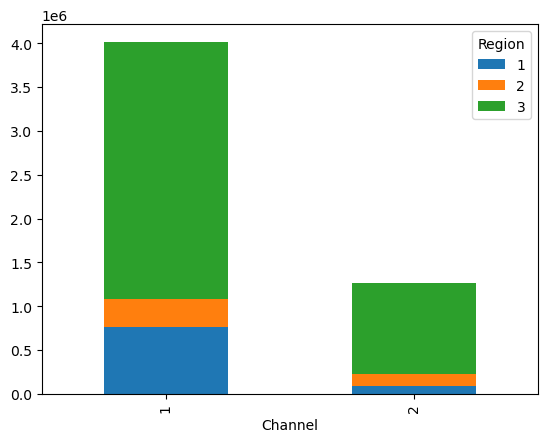

In [8]:
# Creating a pivot table to summarize the data by channel and region for attribute 'fresh'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Fresh', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

### This plot provides evidence that the horeca channel, represented by channel 1, spends the most on fresh items. It also shows that region 3 in particular has a higher spending on fresh items. In contrast, the retail channel in region 2 spends a significantly smaller amount on fresh items. 

<Axes: xlabel='Channel'>

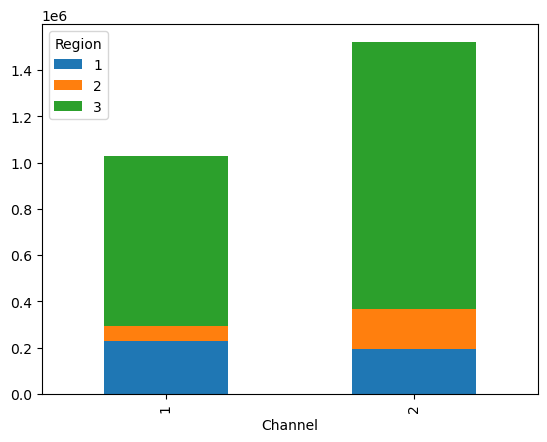

In [9]:
# Creating a pivot table to summarize the data by channel and region for attribute 'milk'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Milk', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

### the data suggests that when it comes to milk items, channel 2, which represents the retail channel, tends to spend the most. Additionally, the data indicates that region 3 has a higher than average spending on milk items. On the other hand, the horeca channel located in region 1 appears to spend considerably less on milk items.

<Axes: xlabel='Channel'>

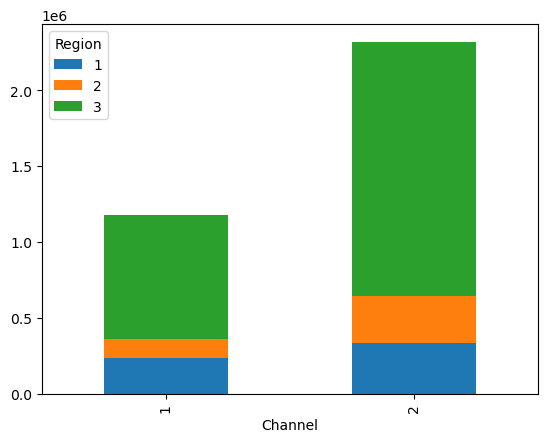

In [10]:
# Creating a pivot table to summarize the data by channel and region for attribute 'Grocery'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Grocery', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

<Axes: xlabel='Channel'>

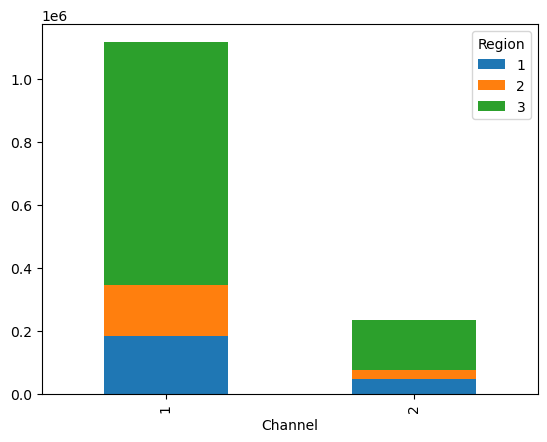

In [11]:
# Creating a pivot table to summarize the data by channel and region for attribute 'Frozen'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Frozen', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

<Axes: xlabel='Channel'>

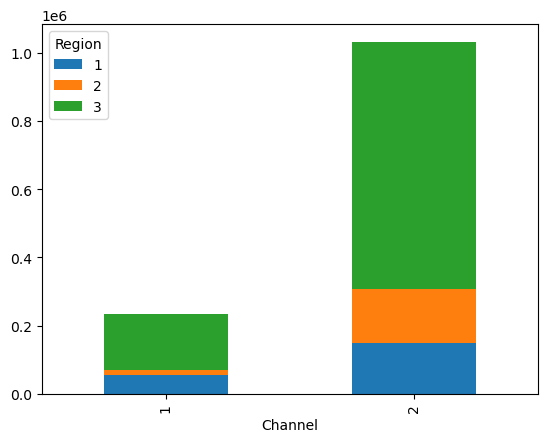

In [12]:
# Creating a pivot table to summarize the data by channel and region for attribute 'Detergents_Paper'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Detergents_Paper', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

<Axes: xlabel='Channel'>

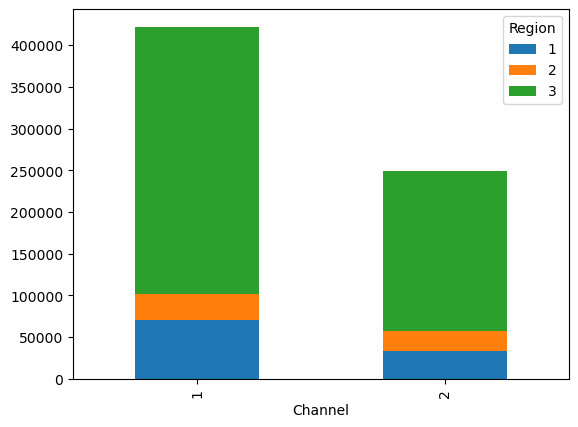

In [13]:
# Creating a pivot table to summarize the data by channel and region for attribute 'Delicassen'
pivot_table = df.pivot_table(index='Channel', columns='Region', values='Delicassen', aggfunc='sum')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True)

### In region 3, channel 1 appears to have a greater tendency to purchase frozen items, and they also have the highest spending on Delicassen products compared to the other channels. Meanwhile, in the same region, channel 2 tends to spend more on grocery items and detergent powder compared to the other channels.
### The data indicates that in region 2, there is a lower spending trend for Delicassen products in channel 2, and a lower spending trend for detergent powder and frozen items in channel 1 compared to the other channels.

In [14]:
# filtering the original dataframe on the basis of channel to explore 
chanel1 = df[df.Channel==1]
chanel2 = df[df.Channel==2]

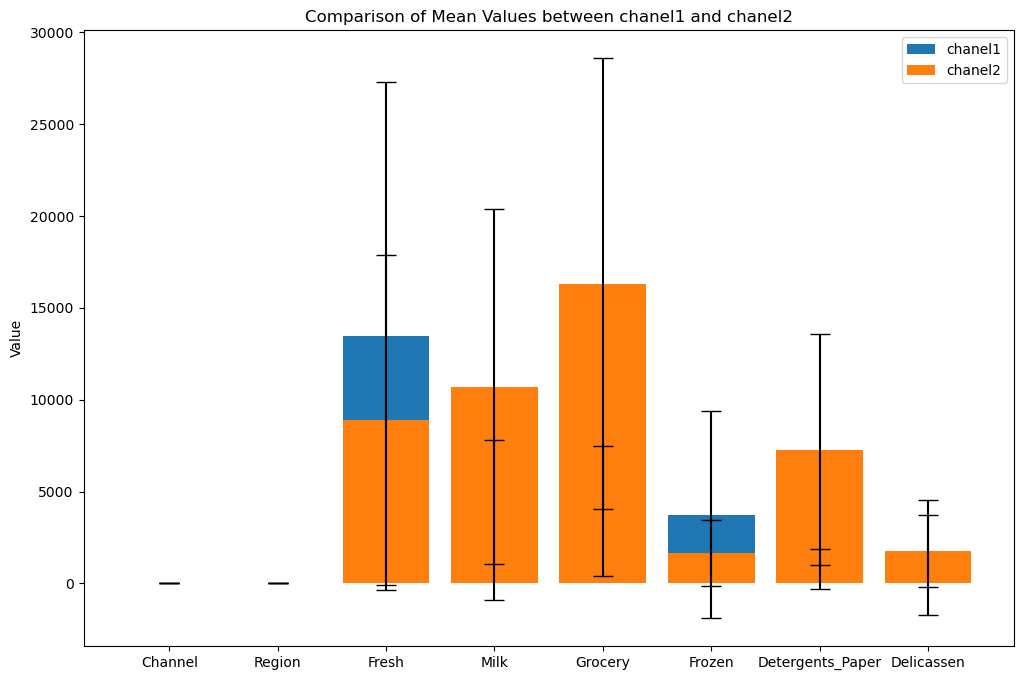

In [15]:
# creating a lists to store mean and std for each column in two dataframe 'chanel1' and  'chanel2'. 
means_chanel1 = []
stds_chanel1 = []
means_chanel2 = []
stds_chanel2 = []

# iterate over each column in both dataframes
for col in chanel1.columns:
    # calculate mean and std for chanel1
    chanel1_mean = chanel1[col].mean()
    chanel1_std = chanel1[col].std()
    means_chanel1.append(chanel1_mean)
    stds_chanel1.append(chanel1_std)
    
    # calculate mean and std for chanel2
    chanel2_mean = chanel2[col].mean()
    chanel2_std = chanel2[col].std()
    means_chanel2.append(chanel2_mean)
    stds_chanel2.append(chanel2_std)

# plot the mean values with error bars for each column
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(chanel1.columns, means_chanel1, yerr=stds_chanel1, capsize=7, label='chanel1')
ax.bar(chanel2.columns, means_chanel2, yerr=stds_chanel2, capsize=7, label='chanel2')
ax.set_ylabel('Value')
ax.set_title('Comparison of Mean Values between chanel1 and chanel2')
ax.legend()
plt.show()

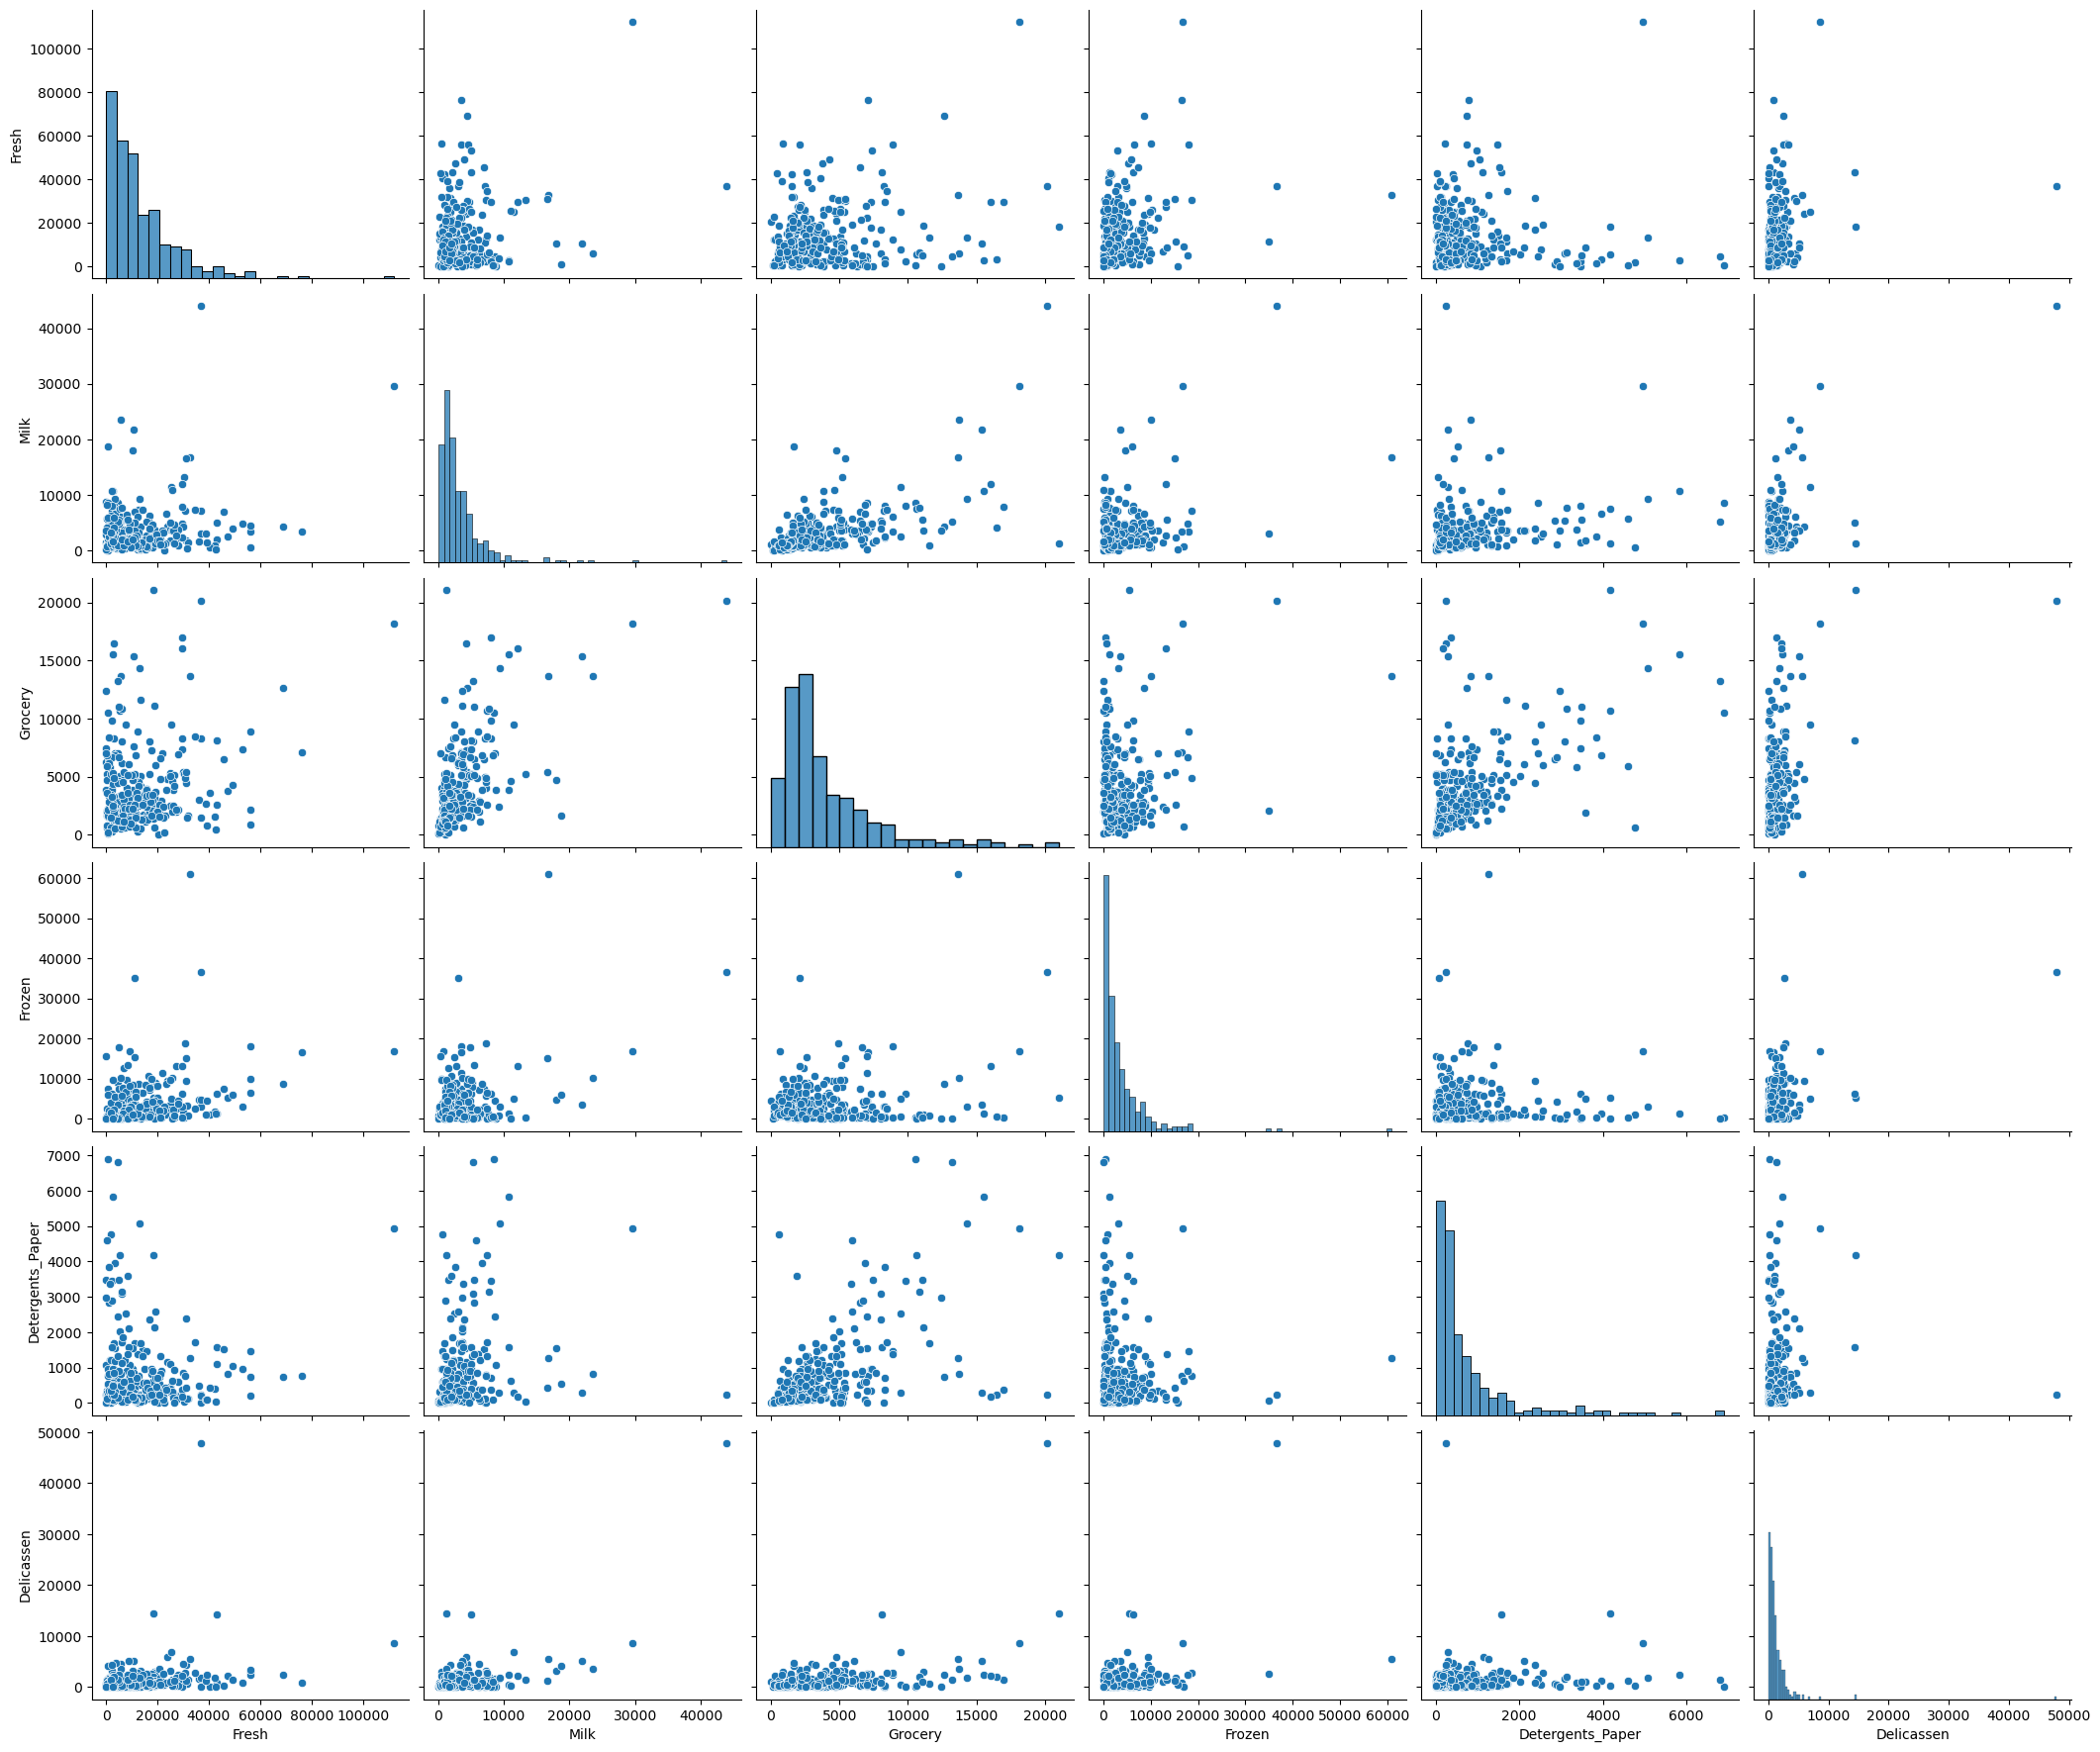

In [16]:
col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
# Creating a scatter plot matrix for 'chanel1'  dataframe
sns.pairplot(data=chanel1[col], height=3, aspect=1.2)

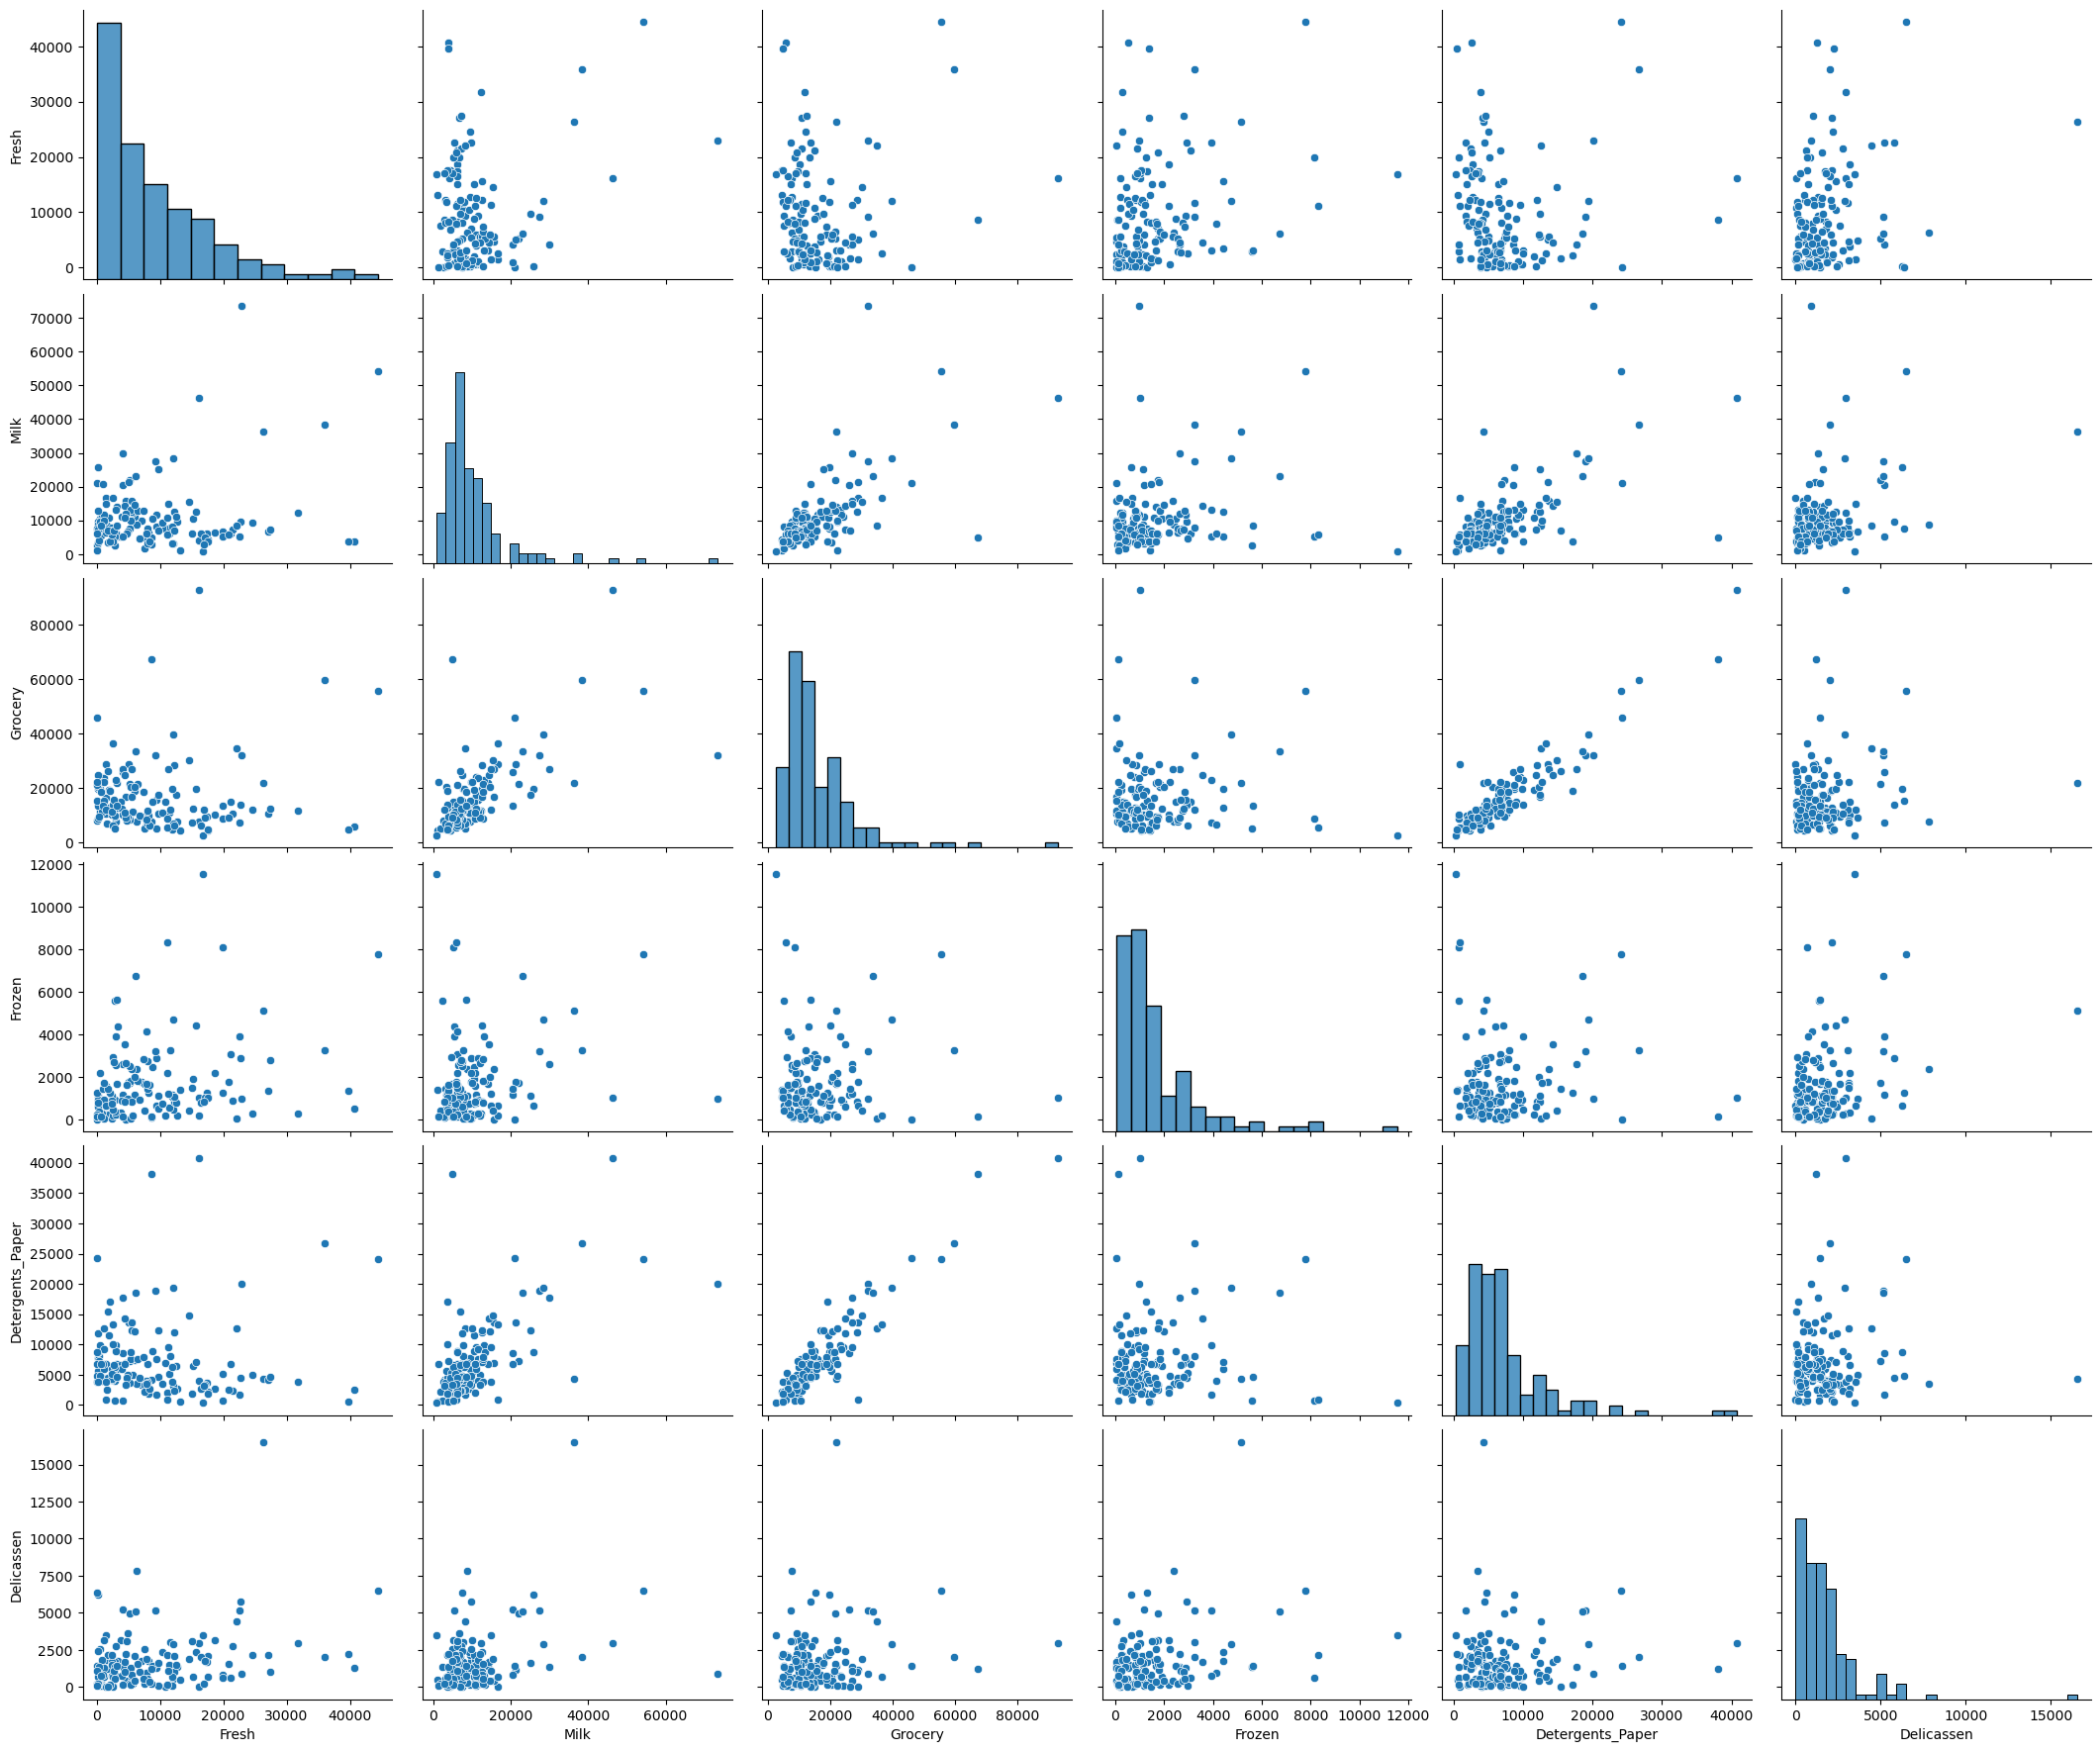

In [17]:
col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
# Creating a scatter plot matrix for 'chanel2'  dataframe
sns.pairplot(data=chanel2[col], height=3, aspect=1.2)

In [18]:
# Selecting only those columns which we want to include in the correlation matrix for 'df' dataframe.
columns_to_correlate = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

# Calculating the correlation matrix for only continous value
corr_matrix = df[columns_to_correlate].corr()

# Printing the correlation matrix
print(corr_matrix)

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


<Axes: >

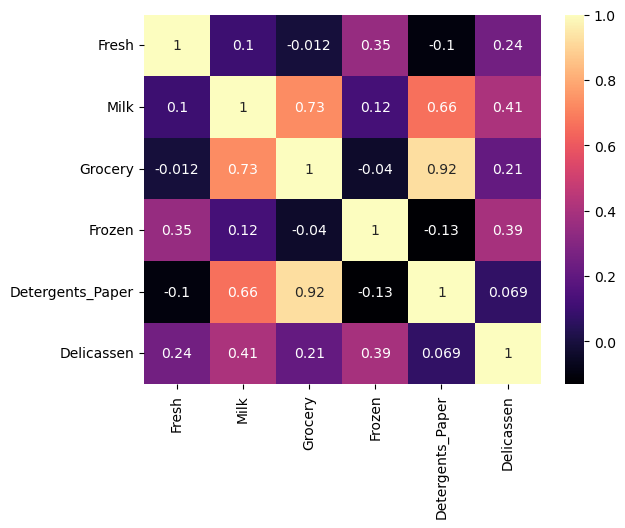

In [19]:
# plotting heatmap to check the correlation
sns.heatmap(corr_matrix, annot=True, cmap='magma')

### Looking at the corrleation matrix and heatmap, it appears that there is a positive correlation between milk, grocery, and detergent paper products, which means that they are often purchased together. On the other hand, fresh products seem to have a weak positive correlation with frozen and delicatessen products. These correlations can be useful for identifying patterns in customer behavior and making decisions related to product offerings and inventory management.

# We will cluster the sales on the basis of 'Channel' and 'Region' both. 
## So, we are copying the original dataframe to perform the clustering of the goods on the basis of 'Region' first. 

In [20]:
# copying dataframe df into new_df
new_df = df.copy()
# Selecting the column which we are using for clustering
clustering_column = 'Region'

In [21]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(new_df.drop([clustering_column], axis=1))

In [22]:
# Performing PCA to reduce the dimension of the dataframe
pca = PCA()
# fitting a PCA model on the DataFrame 'X1'
pca.fit(X)

PCA()

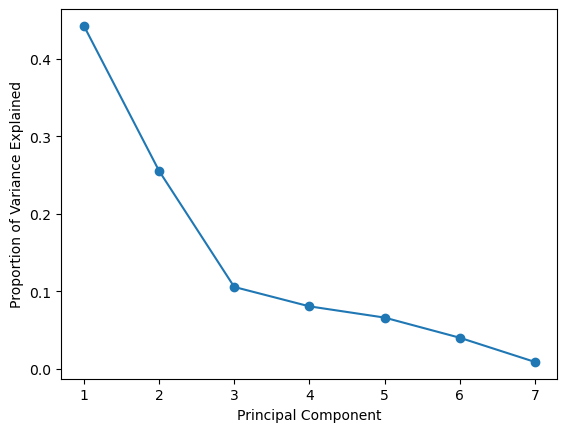

In [23]:
# scree plotting of the principal components,
# creating a line plot of the proportion of variance explained by each principal component,
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

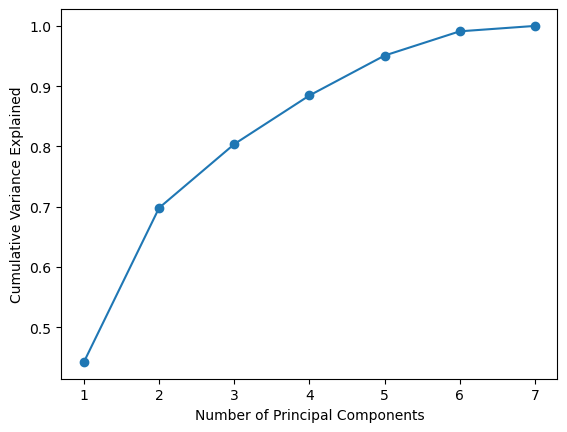

In [24]:
# Calculating the cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative variance explained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

### We will take 2 principal components as we want to keep atleast  0.7 cummulative variance after dimension reduction.

In [25]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

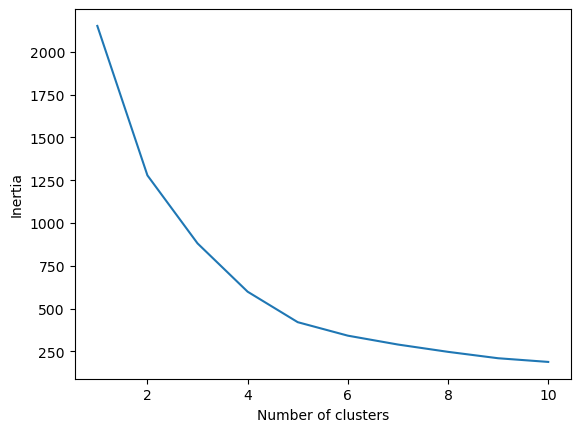

In [26]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [71]:
# Apply k-means clustering with the chosen number of clusters (in this example, 3) in 'X_2d' dataframe. 
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_2d)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [83]:
#y_pred = kmeans.fit_predict(X_2d)  

In [72]:
kmeans.cluster_centers_

array([[ 2.18182964, -0.35542106],
       [-0.88527912,  0.14421238]])

In [74]:
centroids.shape

(2, 2)

In [75]:
# Assigning the cluster labels to the original dataset 'new_df'
new_df['cluster'] = labels
# Grouping the customers by their assigned cluster and their original region
grouped = new_df.groupby(['cluster', clustering_column]).size()
print(grouped)

cluster  Region
0        1          18
         2          15
         3          94
1        1          59
         2          32
         3         222
dtype: int64


In [ ]:
new_df1 = new_df[new_df.cluster==0]
new_df2 = new_df[new_df.cluster==0]

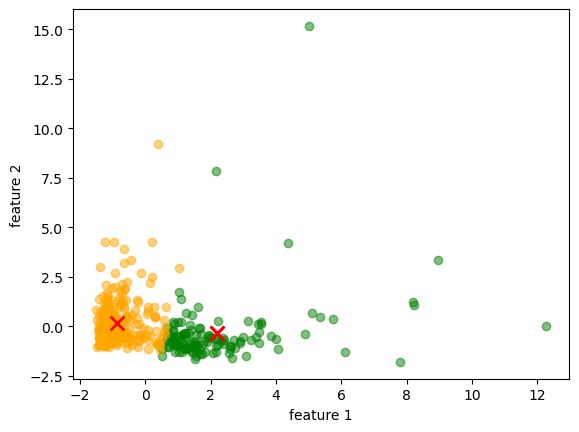

In [76]:
# while choosing  (two, 2) cluster
# Plotting the results on a 2D scatter plot
colors = ['green', 'orange']
fig, ax = plt.subplots()
for i in range(2):
    plt.scatter(X_2d[labels == i, 0], X_2d[labels == i, 1], color=colors[i], alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, linewidths=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

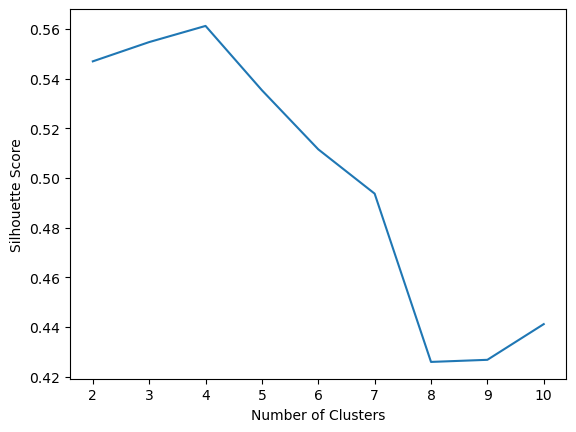

In [77]:
from sklearn.metrics import silhouette_score
# performing clustering for different number of clusters
# initializing an empty list to store the silhouette_scores values for different numbers of clusters.
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plotting silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### The Silhouette Score is a metric used to evaluate the quality of clustering results. It ranges from -1 to 1, where a score closer to 1 indicates a well-separated and distinct cluster. In this case, a Silhouette Score of 0.54 is considered moderate, indicating a decent level of separation between the two clusters interms of region.

## So, Now we will use original dataframe to perform the clustering of the goods on the basis of 'Channel' . 

In [37]:
df.shape

(440, 8)

In [38]:
# Selecting the column to be used for clustering
clustering_column1 = 'Channel'

In [39]:
# Scaling the data
scaler = StandardScaler()
X1 = scaler.fit_transform(df.drop([clustering_column1], axis=1))

In [40]:
# Performing PCA
pca1 = PCA()
# fitting a PCA model on the DataFrame 'X1'
pca1.fit(X1)

PCA()

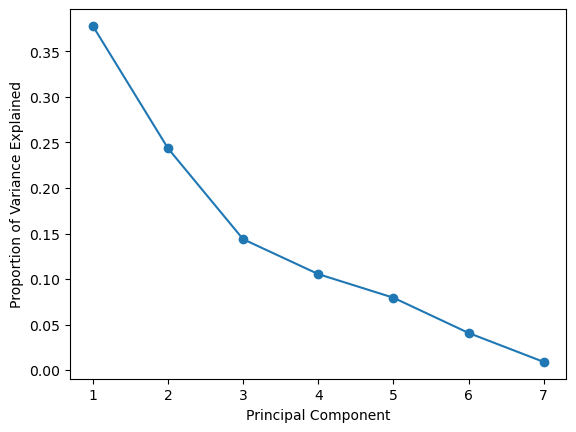

In [41]:
# scree plotting of the principal components,
# creating a line plot of the proportion of variance explained by each principal component,
plt.plot(range(1, len(pca1.explained_variance_ratio_) + 1), pca1.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

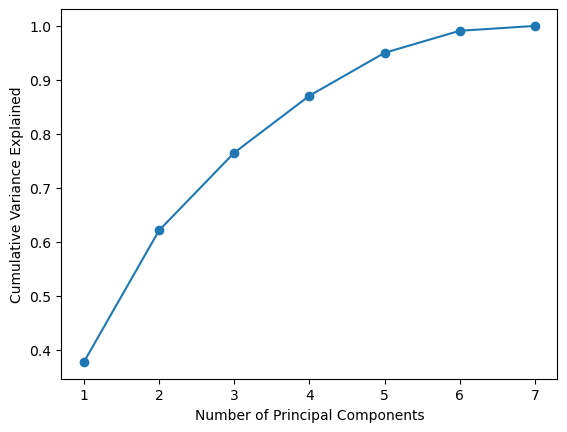

In [42]:
# Calculating the cumulative variance explained
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)

# Plotting the cumulative variance explained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [43]:
# Applying PCA to reduce the data to 2 dimensions
pca1 = PCA(n_components=2)
X1_2d = pca1.fit_transform(X1)

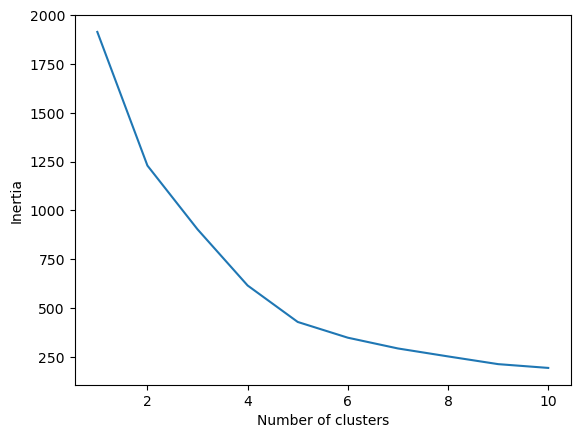

In [44]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X1_2d)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# Applying k-means clustering with the 2 number of clusters
kmeans1 = KMeans(n_clusters=2, random_state=0)
kmeans1.fit(X1_2d)
labels1 = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_

In [95]:
centroids1

array([[-0.41835814,  0.0475175 ],
       [ 3.67225477, -0.41709803]])

In [46]:
# Assigning the cluster labels to the original dataset
df['cluster1'] = labels1
# Groupping the customers by their assigned cluster and their original region
grouped = df.groupby(['cluster1', clustering_column1]).size()
print(grouped)

cluster1  Channel
0         1          296
          2           99
1         1            2
          2           43
dtype: int64


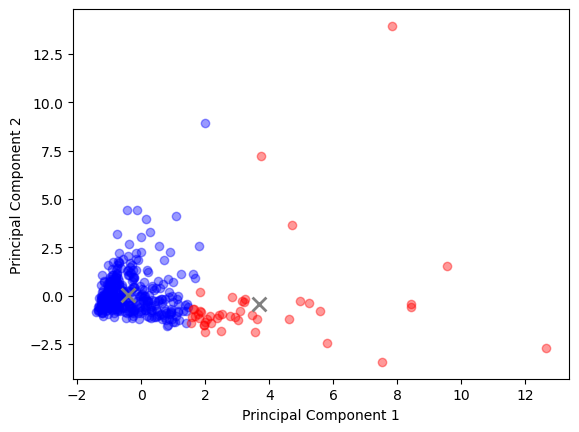

In [47]:
# Plotting the results on a 2D scatter plot
colors = ['blue', 'red']
fig, ax = plt.subplots()
for i in range(2):
    plt.scatter(X1_2d[labels1 == i, 0], X1_2d[labels1 == i, 1], color=colors[i], alpha=0.4)
ax.scatter(centroids1[:, 0], centroids1[:, 1], c='gray', marker='x', s=100, linewidths=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

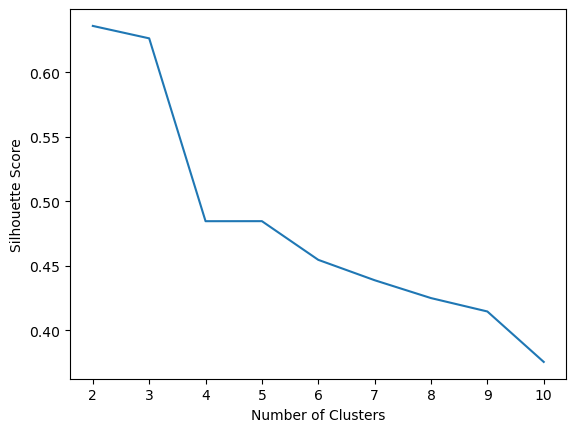

In [48]:
from sklearn.metrics import silhouette_score
# performing clustering for different number of clusters
# initializing an empty list to store the silhouette_scores values for different numbers of clusters.
silhouette_scores1 = []
for n_clusters in range(2, 11):
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(X1_2d)
    silhouette_avg1 = silhouette_score(X1_2d, cluster_labels1)
    silhouette_scores1.append(silhouette_avg1)

# plotting silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

###  In this case, a Silhouette Score of 0.64 is considered good, indicating a high level of separation between the two clusters in terms of channel. it suggests that the clustering results are meaningful and can be relied upon for making business decisions.

# Implementing DBSCAN Algorthim

### In this case, DBSCAN is applied after treating outliers without reducing the high dimensionality of the data. This approach can help to identify clusters that are dense and well-separated, as DBSCAN is capable of handling high-dimensional data. 
### Applying DBSCAN after treating outliers can lead to more accurate and meaningful clustering results, especially when dealing with high-dimensional data.

In [52]:
new_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [53]:
db_df = new_df.drop(['cluster'],axis=1)

In [54]:
db_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
from scipy.stats import iqr

In [56]:
# Computing the interquartile range (IQR)
q1 = np.percentile(db_df, 25)
q3 = np.percentile(db_df, 75)
iqr = q3 - q1

In [57]:
# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [58]:
# Identify the outlier data points
outliers = (db_df < lower_bound) | (db_df > upper_bound)

In [59]:
outliers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,True,True,True,True,False,False
436,False,False,True,False,False,False,False,False
437,False,False,True,True,True,False,True,False
438,False,False,False,False,False,False,False,False


In [60]:
# Counting the number of outliers
n_outliers = np.sum(outliers)

In [61]:
n_outliers

Channel               0
Region                0
Fresh               158
Milk                 47
Grocery              91
Frozen               16
Detergents_Paper     23
Delicassen            4
dtype: int64

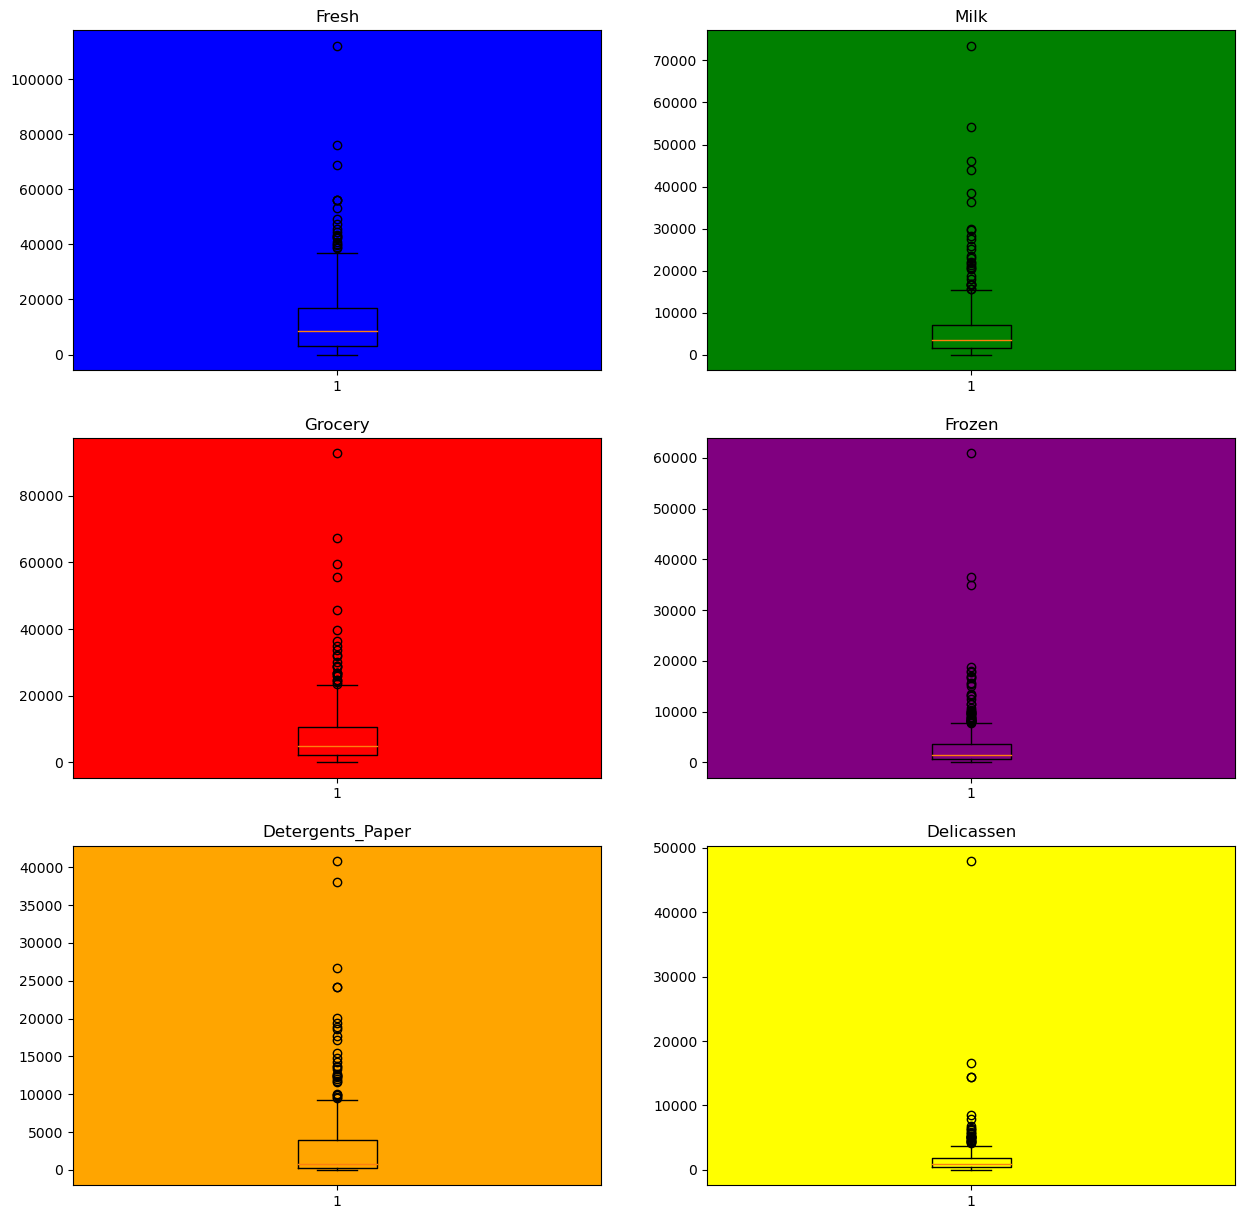

In [62]:
# Creating a boxplot and six subplots for each boxplot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow'] 
# Creating the first boxplot for Fresh
ax1.boxplot(db_df['Fresh'])
ax1.set_title('Fresh')
ax1.set_facecolor(colors[0])

# Creating the second boxplot for Milk
ax2.boxplot(db_df['Milk'])
ax2.set_title('Milk')
ax2.set_facecolor(colors[1])

# Creating the third boxplot for Grocery
ax3.boxplot(db_df['Grocery'])
ax3.set_title('Grocery')
ax3.set_facecolor(colors[2])

# Creating the fourth boxplot for Frozen
ax4.boxplot(db_df['Frozen'])
ax4.set_title('Frozen')
ax4.set_facecolor(colors[3])

# Creating the fifth boxplot for Detergents_Paper
ax5.boxplot(db_df['Detergents_Paper'])
ax5.set_title('Detergents_Paper')
ax5.set_facecolor(colors[4])

# Creating the sixth boxplot for Delicassen
ax6.boxplot(db_df['Delicassen'])
ax6.set_title('Delicassen')
ax6.set_facecolor(colors[5])

# Show the plot
plt.show()

## Since, we have very small number of dataset we will not remove the outliers instead will replace with median value.

In [63]:
# Replacing the outliers with the median value of the column
for col in db_df.columns:
    if col != 'cluster':
        median = db_df[col].median()
        q1, q3 = np.percentile(db_df[col], [25, 75])
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        db_df[col] = np.where((db_df[col] < low) | (db_df[col] > high), median, db_df[col])

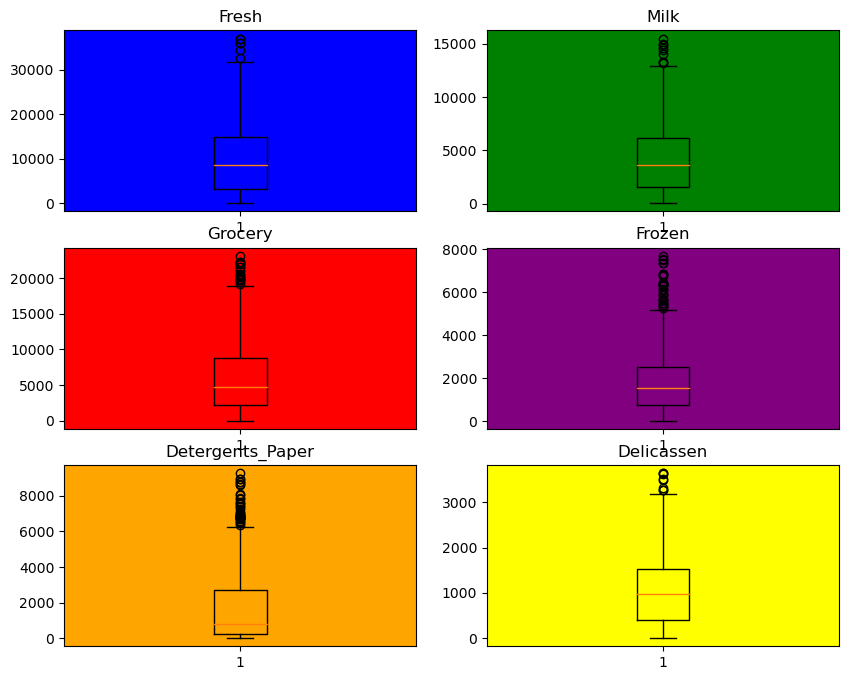

In [64]:
# Creating a boxplot and six subplots for each boxplot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow'] 

# Creating the first boxplot for Fresh
ax1.boxplot(db_df['Fresh'])
ax1.set_title('Fresh')
ax1.set_facecolor(colors[0])
# Creating the second boxplot for Milk
ax2.boxplot(db_df['Milk'])
ax2.set_title('Milk')
ax2.set_facecolor(colors[1])
# Creating the third boxplot for Grocery
ax3.boxplot(db_df['Grocery'])
ax3.set_title('Grocery')
ax3.set_facecolor(colors[2])
# Creating the fourth boxplot for Frozen
ax4.boxplot(db_df['Frozen'])
ax4.set_title('Frozen')
ax4.set_facecolor(colors[3])
# Creating the fifth boxplot for Detergents_Paper
ax5.boxplot(db_df['Detergents_Paper'])
ax5.set_title('Detergents_Paper')
ax5.set_facecolor(colors[4])
# Creating the sixth boxplot for Delicassen
ax6.boxplot(db_df['Delicassen'])
ax6.set_title('Delicassen')
ax6.set_facecolor(colors[5])
# Show the plot
plt.show()

In [65]:
# Computing the interquartile range (IQR)
q1 = np.percentile(db_df, 25)
q3 = np.percentile(db_df, 75)
iqr = q3 - q1
# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Identify the outlier data points
outliers = (db_df < lower_bound) | (db_df > upper_bound)
# Counting the number of outliers
n_outliers = np.sum(outliers)
print('Number of Outliers:',n_outliers)

Number of Outliers: Channel               0
Region                0
Fresh               179
Milk                 44
Grocery             100
Frozen                0
Detergents_Paper      0
Delicassen            0
dtype: int64


In [66]:
# scalling the data before implementing it to model
from sklearn.preprocessing import StandardScaler
# Creating a StandardScaler object
scaler = StandardScaler()

# Standardize the selected features
db_df1 = scaler.fit_transform(db_df)

In [67]:
from sklearn.cluster import DBSCAN

# Creating an instance of DBSCAN clustering algorithm
dbscan = DBSCAN(eps=2.65, min_samples=1)

# Fittibg the db_df1 to the DBSCAN model
dbscan.fit(db_df1)

# Getting the labels assigned by the algorithm
labels = dbscan.labels_

# Adding it to the cluster labels to the original DataFrame 'db_df'
db_df['cluster'] = labels

In [68]:
# Printing the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

Number of clusters found: 2


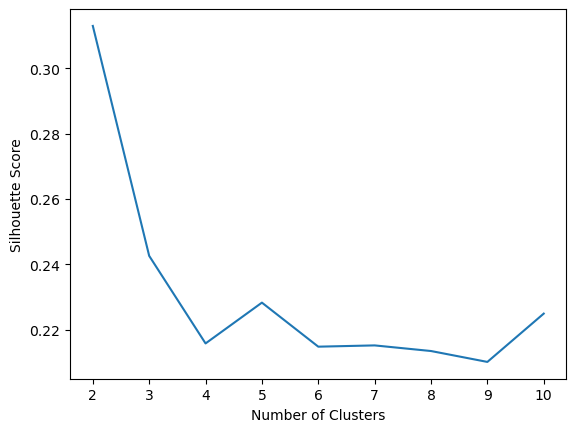

In [96]:
from sklearn.metrics import silhouette_score
# performing clustering for different number of clusters
# initializing an empty list to store the silhouette_scores values for different numbers of clusters.
silhouette_scores1 = []
for n_clusters in range(2, 11):
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(db_df1)
    silhouette_avg1 = silhouette_score(db_df1, cluster_labels1)
    silhouette_scores1.append(silhouette_avg1)

# plotting silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### In this case, DBSCAN was applied without reducing the dimensionality of the features, and it resulted in two clusters. However, when the Silhouette Score was computed to evaluate the quality of the clustering, a score of 0.32 was obtained. This score is considered low and suggests that the clusters may not be well-separated and distinct.

### One possible explanation for the low Silhouette Score could be that the high dimensionality of the feature space has led to a sparse and noisy dataset, making it difficult for DBSCAN to identify meaningful clusters. In such cases, it may be necessary to perform feature reduction techniques or use other clustering algorithms that are better suited for high-dimensional data.